In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [3]:
# Load breast cancer data and hot encodes categorical variable
WBCD = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ZybookDataScience/Data/WisconsinBreastCancerDatabase.csv")
WBCD.loc[WBCD['Diagnosis'] == 'B', 'Diagnosis'] = 0
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis'] = 1

In [15]:
# Store relevant columns as variables
X = WBCD[['Radius mean']].values.reshape(-1, 1)
y = WBCD[['Diagnosis']].values.reshape(-1, 1).astype(int)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [45]:
# Logistic regression predicting diagnosis from tumor radius
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))
cutoff = 0.85


yPredictedProb = logisticModel.predict_proba(X)[:, 1]
print(logisticModel.predict_proba(X))
#returns the predicted probabilites for each class for the input x.
#the first column --> probability fo the sample belonging to class 0
#second colum --> probability for the sample belonging to class 1.

yPred_instance = logisticModel.predict([[18]])
print(yPred_instance)

print(yPredictedProb[:10]) # print the first 10 elements (probabilities)

yPredLowCutoff = []
for i in range(0, yPredictedProb.size):
    if yPredictedProb[i] < cutoff:
        yPredLowCutoff.append(0)
    else:
        yPredLowCutoff.append(1)

print (yPredLowCutoff[:10])

[[3.50231698e-02 9.64976830e-01]
 [2.57045003e-03 9.97429550e-01]
 [6.31226875e-03 9.93687731e-01]
 ...
 [1.31122346e-01 8.68877654e-01]
 [2.49279099e-03 9.97507209e-01]
 [9.99232545e-01 7.67454839e-04]]
[1]
[0.96497683 0.99742955 0.99368773 0.03169326 0.99657781 0.08599925
 0.97294999 0.25507126 0.14189551 0.08680851]
[1, 1, 1, 0, 1, 0, 1, 0, 0, 0]


In [46]:
# Display confusion matrix

metrics.confusion_matrix(y, yPredLowCutoff)

#note that in the 2x2 metrix below, 24 is a false-positive value, and 45 is a false-negative value

array([[354,   3],
       [ 89, 123]])

In [47]:
# Display accuracy
metrics.accuracy_score(y, yPredLowCutoff)

0.8383128295254832

In [48]:
# Display precision
metrics.precision_score(y, yPredLowCutoff)

0.9761904761904762

In [49]:
# Display recall
metrics.recall_score(y, yPredLowCutoff)

0.5801886792452831

[0.96497683 0.99742955 0.99368773 0.03169326 0.99657781 0.08599925
 0.97294999 0.25507126 0.14189551 0.08680851]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.00471698 0.18867925 0.19811321 0.24528302 0.27358491
 0.28301887 0.29245283 0.39150943 0.4009434 ]
[       inf 0.99999887 0.99624826 0.99617084 0.9936231  0.99257092
 0.99185868 0.99152078 0.97785359 0.97452263]
0.9375165160403784


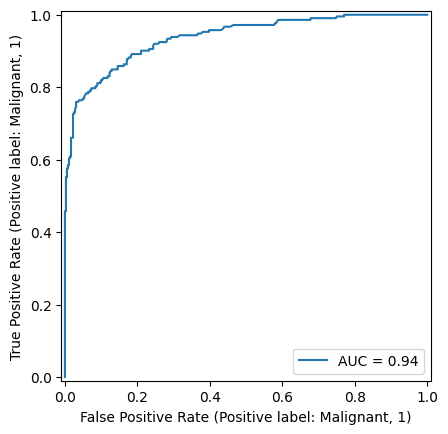

In [43]:
# Plot the ROC curve
pred = logisticModel.predict_proba(X)[:, 1]
print(pred[:10])

fpr, tpr, thresholds = metrics.roc_curve(y, pred)
#false positive rate (1-specificity)
#true positive rate (sensitivite = recall)

print(fpr[:10])
print(tpr[:10])
print(thresholds[:10])


roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, pos_label='Malignant, 1'
)

display.plot()
plt.show()